# Import libraries

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim

# Dataset


## Download dataset

In [0]:
!wget --output-document=Apple\ Financial\ Report.csv "https://drive.google.com/uc?export=download&id=1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s"

--2020-04-19 13:29:41--  https://drive.google.com/uc?export=download&id=1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s
Resolving drive.google.com (drive.google.com)... 108.177.119.100, 108.177.119.139, 108.177.119.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ae7aj3tmp2uufuusgkdanbmrq1i9t5to/1587302925000/08674965411100473451/*/1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s?e=download [following]
--2020-04-19 13:29:41--  https://doc-0k-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ae7aj3tmp2uufuusgkdanbmrq1i9t5to/1587302925000/08674965411100473451/*/1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s?e=download
Resolving doc-0k-9c-docs.googleusercontent.com (doc-0k-9c-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to doc-0k-9c-docs.googleusercontent.com (d

## Load dataset

In [0]:
def load_unicef_data():
    
    fname = 'Apple Financial Report.csv'

    # Uses pandas to help with string-NaN-numeric data.
    data = pd.read_csv(fname, na_values='_', encoding='latin1')
    # Strip countries title from feature names.
    features = data.axes[1][1:]
    # Separate country names from feature values.
    quarters = data.values[:,0]
    values = data.values[:,1:]
    # Convert to numpy matrix for real.
    values = np.asmatrix(values,dtype='float32')

    # Modify NaN values (missing values).
    mean_vals = np.nanmean(values, axis=0)
    inds = np.where(np.isnan(values))
    values[inds] = np.take(mean_vals, inds[1])
    return (quarters, features, values)

In [0]:
(quarters, features, values) = load_unicef_data()

In [0]:
print(quarters)

['2-Q 2005' '3-Q 2005' '4-Q 2005' '1-Q 2006' '2-Q 2006' '3-Q 2006'
 '4-Q 2006' '1-Q 2007' '2-Q 2007' '3-Q 2007' '4-Q 2007' '1-Q 2008'
 '2-Q 2008' '3-Q 2008' '4-Q 2008' '1-Q 2009' '2-Q 2009' '3-Q 2009'
 '4-Q 2009' '1-Q 2010' '2-Q 2010' '3-Q 2010' '4-Q 2010' '1-Q 2011'
 '2-Q 2011' '3-Q 2011' '4-Q 2011' '1-Q 2012' '2-Q 2012' '3-Q 2012'
 '4-Q 2012' '1-Q 2013' '2-Q 2013' '3-Q 2013' '4-Q 2013' '1-Q 2014'
 '2-Q 2014' '3-Q 2014' '4-Q 2014' '1-Q 2015' '2-Q 2015' '3-Q 2015'
 '4-Q 2015' '1-Q 2016' '2-Q 2016' '3-Q 2016' '4-Q 2016' '1-Q 2017'
 '2-Q 2017' '3-Q 2017' '4-Q 2017' '1-Q 2018' '2-Q 2018' '3-Q 2018'
 '4-Q 2018' '1-Q 2019' '2-Q 2019' '3-Q 2019' '4-Q 2019' '1-Q 2020']


In [0]:
print(features)

Index(['Net Income', 'Net Sales /Revenue', 'Cost of Sales',
       'Operating Expenses', 'Operating Income', 'Net Sales By iPhone',
       'Net Sales By iPad', 'Net Sales By Mac', 'Net Sales By Service',
       'Net Sales By Wearables, Home and Accessories \n',
       'If new product comes out (iPhone)', 'If new product comes out (iPad)',
       'If new product comes out (Mac)',
       'If new product comes out (Wearables, Home and Accessories)',
       'New Revolutional technique'],
      dtype='object')


In [0]:
print(values)

[[2.9000000e+02 3.2430000e+03 2.2750000e+03 2.8410000e+03 4.0200000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00]
 [3.1900000e+02 3.5200000e+03 2.4760000e+03 3.0940000e+03 4.2600000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.2400000e+02 3.6780000e+03 2.6440000e+03 3.2660000e+03 4.1200000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [5.6500000e+02 5.7490000e+03 4.1850000e+03 4.9990000e+03 7.5000000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [4.1000000e+02 4.3590000e+03 3.0620000e+03 3.8300000e+03 5.2900000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.

## Seperate dataset to train set and test set

In [0]:
targets = values[:,0]
x = values[:,2:]

N_TRAIN = 50
q_train = quarters[0:N_TRAIN]
q_test = quarters[N_TRAIN:]
x_train = torch.from_numpy(x[0:N_TRAIN,:]).view(-1, 1, 13)
x_test = torch.from_numpy(x[N_TRAIN:,:]).view(-1, 1, 13)
t_train = torch.from_numpy(targets[0:N_TRAIN])
t_test = targets[N_TRAIN:]

In [0]:
print(x_train.size())
print(t_train.reshape(50))
print(t_train.size())

torch.Size([50, 1, 13])
tensor([  290.,   319.,   424.,   565.,   410.,   472.,   542.,  1004.,   770.,
          818.,   903.,  1581.,  1045.,  1072.,  2421.,  2255.,  1620.,  1828.,
         2532.,  3378.,  3074.,  3253.,  4308.,  6004.,  5987.,  7308.,  6623.,
        13064., 11622.,  8824.,  8223., 13078.,  9547.,  6900.,  7512., 13072.,
        10223.,  7748.,  8467., 18024., 13569., 10677., 11124., 18361., 10516.,
         7796.,  9014., 17891., 11029.,  8717.])
torch.Size([50, 1])


# Create model

In [0]:
class SimpleRNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size=13,
                          hidden_size=hidden_size,
                          num_layers=1)
        self.linear = nn.Linear(hidden_size, 1)
 
    def forward(self, seq, hc=None):
        tmp, hc = self.rnn(seq, hc)
        out = self.linear(tmp)
        return out, hc

In [0]:
hidden_size = 256
learning_rate = 0.2

model = SimpleRNN(hidden_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), learning_rate)

In [0]:
print(model)

SimpleRNN(
  (rnn): RNN(13, 256)
  (linear): Linear(in_features=256, out_features=1, bias=True)
)


# Train the model

In [0]:
epochs = 50000
for epoch in range(epochs):
    optimizer.zero_grad()
    output, _ = model(x_train)
    loss = criterion(output.view(-1), t_train.view(-1))
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch {}: loss {}".format(epoch, loss.item()))
    if loss.item() <= 41000:
      print("Epoch {}: loss {}".format(epoch, loss.item()))
      break

Epoch 0: loss 66612796.0
Epoch 100: loss 30365352.0
Epoch 200: loss 18420572.0
Epoch 300: loss 13333624.0
Epoch 400: loss 10308431.0
Epoch 500: loss 8356292.5
Epoch 600: loss 7065835.5
Epoch 700: loss 6186422.5
Epoch 800: loss 5564418.0
Epoch 900: loss 5108186.5
Epoch 1000: loss 4761936.5
Epoch 1100: loss 4489878.0
Epoch 1200: loss 4268049.5
Epoch 1300: loss 4080187.0
Epoch 1400: loss 3915359.75
Epoch 1500: loss 3766385.5
Epoch 1600: loss 3628655.75
Epoch 1700: loss 3499272.75
Epoch 1800: loss 3376418.25
Epoch 1900: loss 3258942.75
Epoch 2000: loss 3146098.5
Epoch 2100: loss 3037388.25
Epoch 2200: loss 2932468.75
Epoch 2300: loss 2831104.0
Epoch 2400: loss 2733130.0
Epoch 2500: loss 2638433.75
Epoch 2600: loss 2546940.25
Epoch 2700: loss 2458596.0
Epoch 2800: loss 2373360.75
Epoch 2900: loss 2291195.75
Epoch 3000: loss 2212065.75
Epoch 3100: loss 2135925.25
Epoch 3200: loss 2062723.0
Epoch 3300: loss 1992396.625
Epoch 3400: loss 1924875.375
Epoch 3500: loss 1860080.0
Epoch 3600: loss 1

In [0]:
for name, param in model.named_parameters(): 
  if param.requires_grad: 
    print (name, param.data)

rnn.weight_ih_l0 tensor([[-5.1322e-02,  1.4904e-02,  6.3705e-04,  ...,  5.1738e-02,
          5.0143e-02, -1.0574e-02],
        [-5.9849e-02, -3.2204e-02,  5.3438e-02,  ..., -2.3024e-02,
         -4.8477e-02,  5.0824e-04],
        [-3.4083e-02, -3.3618e-02,  3.4186e-02,  ...,  3.1090e-02,
         -2.9516e-02,  4.7103e-02],
        ...,
        [ 1.1932e+00,  1.2341e+00,  1.2176e+00,  ..., -8.8936e-03,
          1.1629e+00,  1.5576e-02],
        [-2.7524e-02,  1.1253e-02,  4.7888e-02,  ..., -2.2279e-02,
         -4.3375e-02, -3.2715e-02],
        [-4.5330e-02,  5.9702e-02,  5.5097e-02,  ..., -2.4148e-03,
          1.7462e-03,  3.8964e-02]])
rnn.weight_hh_l0 tensor([[ 0.0050, -0.0032, -0.0015,  ..., -0.0477,  0.0182, -0.0137],
        [ 0.0482, -0.0480,  0.0073,  ..., -0.0349, -0.0447, -0.0151],
        [-0.0325,  0.0555, -0.0333,  ..., -0.0350, -0.0215, -0.0109],
        ...,
        [-1.2599,  1.2282, -1.1614,  ...,  1.1830,  1.1808,  1.1884],
        [ 0.0107, -0.0247, -0.0574,  ...,

# Make predictions

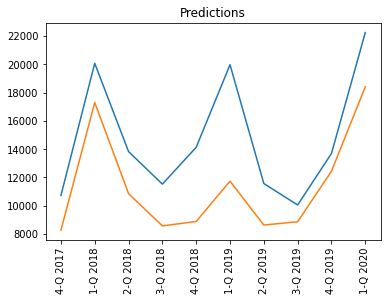

In [0]:
predictions = []
input = x_test[0, :, :]  # choose the first time step as input
hidden_prev = None
for i in range(x_test.shape[0]):
    input = x_test[i, :, :]
    input = input.view(1, 1, 13)
    pred, hidden_prev = model(input, hidden_prev)
    predictions.append(pred.data.numpy()[0, 0, 0])


plt.title('Predictions')

plt.plot(q_test, t_test, label='actual')
plt.plot(q_test, predictions, label='predicted')
plt.xticks(rotation=90)
ax.legend()

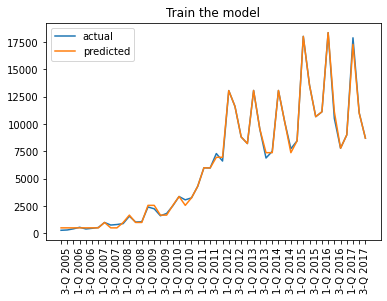

In [0]:
predictions = []
input = x_train[-1, :, :]  # choose the first time step as input
hidden_prev = None
for i in range(x_train.shape[0]):
    input = x_train[i, :, :]
    input = input.view(1, 1, 13)
    pred, hidden_prev = model(input, hidden_prev)
    predictions.append(pred.data.numpy()[0, 0, 0])



plt.title('Train the model')
plt.plot(q_train, t_train, label='actual')
plt.plot(q_train, predictions, label='predicted')
plt.xticks(rotation=90)
ax = plt.gca()
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
ax.legend()